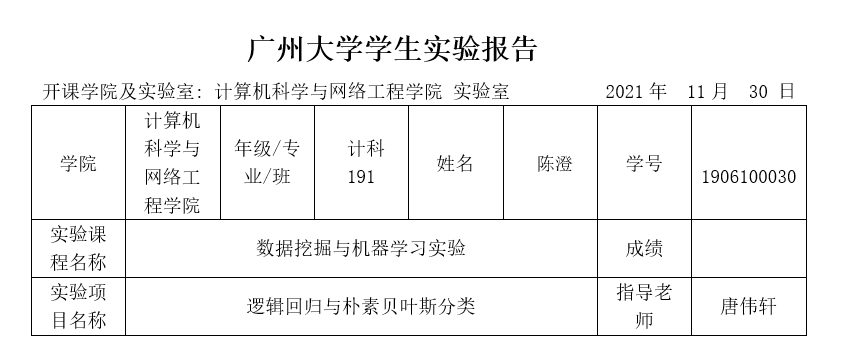

# 实验二  逻辑回归与朴素贝叶斯分类
## 一、	实验目的
本实验课程是计算机、人工智能、软件工程等专业学生的一门专业课程，通过实验，帮助学生更好地掌握数据挖掘与机器学习相关概念、技术、原理、应用等；通过实验提高学生编写实验报告、总结实验结果的能力；使学生对机器学习模型、算法等有比较深入的认识。要掌握的知识点如下：
1.	掌握机器学习中涉及的相关概念、模型、算法；
2.	熟悉机器学习模型训练、验证、测试的流程；
3.	熟悉常用的数据预处理方法；
4.	掌握逻辑回归、贝叶斯分类的表示、求解及编程。

## 二、基本要求

1.	实验前，复习《数据挖掘与机器学习》课程中的有关内容。
2.	准备好实验数据，编程完成实验内容，收集实验结果。
3.	独立完成实验报告。

## 三、实验软件
推荐使用Python编程语言（允许使用numpy库，需实现详细实验步骤，不允许直接调用scikit-learn中回归、分类等高层API）。

## 四、实验内容：

基于Adult数据集，完成关于收入是否大于50K的逻辑回归分类、朴素贝叶斯模型训练、测试与评估。

1. 准备数据集并认识数据

    下载Adult数据集http://archive.ics.uci.edu/ml/datasets/Adult
    
    了解数据集各个维度特征及预测值的含义

2. 探索数据并预处理数据

    观察数据集各个维度特征及预测值的数值类型与分布

    预处理各维度特征，参考：https://blog.csdn.net/SanyHo/article/details/105304292

3. 训练模型

    编程实现训练数据集上逻辑回归模型的梯度下降参数求解、朴素贝叶斯参数统计

4. 测试和评估模型

    在测试数据集上计算所训练模型的准确率、AUC等指标
 
## 五、学生实验报告要求

实验报告需要包含以下几个部分

1. 简要介绍逻辑回归分类的原理
2. 简要介绍朴素贝叶斯分类的原理
3. 程序清单（包含详细求解步骤）
4. 展示实验结果
5. 讨论实验结果，分析各个特征与目标预测类别的正负相关性


--- 



## 逻辑回归

### 原理

- 逻辑回归定义：

    $$
    P(Y=1|x)=\frac{exp(wx)}{1+exp(wx)} \\
    P(Y=0|x)=\frac{1}{1+exp(wx)}
    $$

- 参数估计：

    似然函数
    
    $$
    \begin{aligned}
    \prod_{i=1}^{N}[\pi(x_i)]^{y_i}[1-\pi(x_i)]^{1-y_i}
    \end{aligned}
    $$
    
    对数似然函数：
    
    $$
    \begin{aligned}
    L(w) &= \sum_{i=1}^{N}[y_ilog\pi(x_i)+(1-y_i)log(1-\pi(x_i))]\\
    &= \sum_{i=1}^{N}[y_ilog\frac{\pi(x_i)}{1-\pi(x_i)} + log(1-\pi(x_i))] \\
    &= \sum_{i=1}^{N}[y_i(wx_i)-log(1+exp(wx_i))] \\
    \end{aligned}
    $$
    
    对$L(w)$求极大值，得到$w$的估计值
    

In [1]:
import numpy as np
import pandas as pd

In [2]:
def read_adult_data(path: str = "data/adult.data"):
    data = pd.read_csv(path, header=None)
    data.columns = ["age",
                    "workclass",
                    "fnlwgt",
                    "education",
                    "education-num",
                    "marital-status",
                    "occupation",
                    "relationship",
                    "race", "sex",
                    "capital-gain",
                    "capital-loss",
                    "hours-per-week",
                    "native-country",
                    "result"]
    return data

In [3]:
# 逻辑回归（未实现封装为class）
def predict(w, x):
    '''
    预测标签
    :param w:训练过程中学到的w
    :param x: 要预测的样本
    :return: 预测结果
    '''
    #dot为两个向量的点积操作，计算得到w * x
    wx = np.dot(w, x)
    #计算标签为1的概率
    #该公式参考“6.1.2 二项逻辑斯蒂回归模型”中的式6.5
    P1 = np.exp(wx) / (1 + np.exp(wx))
    #如果为1的概率大于0.5，返回1
    if P1 >= 0.5:
        return 1
    #否则返回0
    return 0

def logisticRegression(trainDataList, trainLabelList, iter = 200):
    '''
    逻辑斯蒂回归训练过程
    :param trainDataList:训练集
    :param trainLabelList: 标签集
    :param iter: 迭代次数
    :return: 习得的w
    '''
    #按照书本“6.1.2 二项逻辑斯蒂回归模型”中式6.5的规则，将w与b合在一起，
    #此时x也需要添加一维，数值为1
    #循环遍历每一个样本，并在其最后添加一个1
    for i in range(len(trainDataList)):
        trainDataList[i].append(1)

    #将数据集由列表转换为数组形式，主要是后期涉及到向量的运算，统一转换成数组形式比较方便
    trainDataList = np.array(trainDataList)
    #初始化w，维数为样本x维数+1，+1的那一位是b，初始为0
    w = np.zeros(trainDataList.shape[1])

    #设置步长
    h = 0.001

    #迭代iter次进行随机梯度下降
    # 导入进图条库
    from tqdm import tqdm
    
    for i in tqdm(range(iter)):
        #每次迭代冲遍历一次所有样本，进行随机梯度下降
        for j in range(trainDataList.shape[0]):
            #随机梯度上升部分
            #在“6.1.3 模型参数估计”一章中给出了似然函数，我们需要极大化似然函数
            #但是似然函数由于有求和项，并不能直接对w求导得出最优w，所以针对似然函数求和
            #部分中每一项进行单独地求导w，得到针对该样本的梯度，并进行梯度上升（因为是
            #要求似然函数的极大值，所以是梯度上升，如果是极小值就梯度下降。梯度上升是
            #加号，下降是减号）
            #求和式中每一项单独对w求导结果为：xi * yi - (exp(w * xi) * xi) / (1 + exp(w * xi))
            #如果对于该求导式有疑问可查看我的博客 www.pkudodo.com

            #计算w * xi，因为后式中要计算两次该值，为了节约时间这里提前算出
            #其实也可直接算出exp(wx)，为了读者能看得方便一点就这么写了，包括yi和xi都提前列出了
            wx = np.dot(w, trainDataList[j])
            yi = trainLabelList[j]
            xi = trainDataList[j]
            #梯度上升
            w +=  h * (xi * yi - (np.exp(wx) * xi) / ( 1 + np.exp(wx)))

    #返回学到的w
    return w

def model_test_ACC(testDataList, testLabelList, w):
    '''
    验证
    :param testDataList:测试集
    :param testLabelList: 测试集标签
    :param w: 训练过程中学到的w
    :return: 正确率
    '''

    #与训练过程一致，先将所有的样本添加一维，值为1，理由请查看训练函数
    for i in range(len(testDataList)):
        testDataList[i].append(1)

    #错误值计数
    errorCnt = 0
    #对于测试集中每一个测试样本进行验证
    for i in range(len(testDataList)):
        #如果标记与预测不一致，错误值加1
        if testLabelList[i] != predict(w, testDataList[i]):
            errorCnt += 1
    #返回准确率
    return 1 - errorCnt / len(testDataList)


In [4]:
# 简单测试
X = [[1,1],[1,1],[1,1],[1,1],[0,0],[0,0],[0,0],[0,0]]
y = [1,1,1,1,0,0,0,0]
w = logisticRegression(X, y)
predict(w, [1,1,1]), predict(w, [0,0,1])

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 8696.28it/s]


(1, 0)

In [9]:
def read_adult_data(path: str = "data/adult.data"):
    data = pd.read_csv(path, header=None)
    data.columns = ["age",
                    "workclass",
                    "fnlwgt",
                    "education",
                    "education-num",
                    "marital-status",
                    "occupation",
                    "relationship",
                    "race", "sex",
                    "capital-gain",
                    "capital-loss",
                    "hours-per-week",
                    "native-country",
                    "result"]
    return data

# 导入数据集
train_data = read_adult_data()
test_data = read_adult_data("data/adult.test")

In [10]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [12]:
train_data.dropna(inplace=True)
train_data.shape
# 没有缺失值

(32561, 15)

In [13]:
test_data.dropna(inplace=True)
test_data.shape
# 没有缺失值

(16281, 15)

In [14]:
# 字符类型的字段转数字类型
def transform_str_to_Num(table, colNames):
    for colName in colNames:
        strs = table[colName].value_counts()
        value_map = dict((v, i) for i, v in enumerate(strs.index))
        table = table.replace({colName:value_map})
    return table

train_data = transform_str_to_Num(train_data, 
                            ["workclass", 
                             "education", 
                             "marital-status", 
                             "occupation", 
                             "relationship", 
                             "race", 
                             "sex", 
                             "native-country", 
                             "result"])
test_data = transform_str_to_Num(test_data,
                            ["workclass", 
                             "education", 
                             "marital-status", 
                             "occupation", 
                             "relationship", 
                             "race", 
                             "sex", 
                             "native-country", 
                             "result"]
                                )

In [15]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,4,77516,2,13,1,3,1,0,0,2174,0,40,0,0
1,50,1,83311,2,13,0,2,0,0,0,0,0,13,0,0
2,38,0,215646,0,9,2,9,1,0,0,0,0,40,0,0
3,53,0,234721,5,7,0,9,0,1,0,0,0,40,0,0
4,28,0,338409,2,13,0,0,4,1,1,0,0,40,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,6,12,0,11,4,0,1,0,0,38,0,0
32557,40,0,154374,0,9,0,6,0,0,0,0,0,40,0,1
32558,58,0,151910,0,9,4,3,3,0,1,0,0,40,0,0
32559,22,0,201490,0,9,1,3,2,0,0,0,0,20,0,0


In [16]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,25,0,226802,5,7,1,6,2,1,0,0,0,40,0,0
1,38,0,89814,0,9,0,11,0,0,0,0,0,50,0,0
2,28,2,336951,6,12,0,12,0,0,0,0,0,40,0,1
3,44,0,160323,1,10,0,6,0,1,0,7688,0,40,0,1
4,18,3,103497,1,10,1,7,2,0,1,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,0,215419,2,13,2,0,1,0,1,0,0,36,0,0
16277,64,3,321403,0,9,3,7,5,1,0,0,0,40,0,0
16278,38,0,374983,2,13,0,0,0,0,0,0,0,50,0,0
16279,44,0,83891,2,13,2,4,2,2,0,5455,0,40,0,0


In [17]:
X_train = train_data.drop("result", axis=1).to_numpy()
y_train = np.array(train_data["result"])

X_test = test_data.drop("result", axis=1).to_numpy()
y_test = np.array(test_data["result"])

In [19]:
# 将特征x标准化，方便收敛
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)


In [20]:
w = logisticRegression(X_train.tolist(), y_train.tolist(), 500)
w

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:33<00:00,  3.25it/s]


array([ 0.57068311,  0.05192557,  0.0686912 , -0.0496405 ,  0.83708499,
       -1.12294247, -0.21347261,  0.06691425, -0.0742386 , -0.20963188,
        2.36221716,  0.28471505,  0.42156184, -0.02499807, -1.69394588])

In [22]:
model_test_ACC(X_test.tolist(), y_test.tolist(), w)

0.8396904367053621

--- 

### 朴素贝叶斯

#### 原理

- 直观理解

    假设有一个手写数字数据集，大小为100，1-10条数据是0，11-20条是1，·····。随便写一个数字X，判断X是几？
    
    朴素贝叶斯的工作原理就是，计算出数字X是数字0-9的概率分别是多少，
    
    $$
       P(Y=0|X) = ?,\ P(Y=1|X),\ ..., P(Y=9|X)
    $$
    
    然后找出概率最大的一个，即是对应的数字。
    
- 数学理解

    对于手写数字数据集，设数字类别为$C_k$，$C_0$表示数字0,$C_1$表示数字1·····。
    
    可得判别公式：
    
    $$
    \begin{aligned}
    P(Y=C_k|X=x) &=  \frac{P(X=x|Y=C_k)P(Y=C_k)}{P(X=x)} \\
    &=\frac{P(X=x|Y=C_k)P(Y=C_k)}{\sum_k P(X=x,Y=C_k)} \\
    &=\frac{P(X=x|Y=C_k)P(Y=C_k}{\sum_k P(X=x|Y=C_k)P(Y=C_k)} \\
    &=\frac{P(Y=C_k)\prod_j(X^{(j)}=x^{(j)}|Y=C_k)}{\sum_k{P(Y=C_k)\prod_j P(X^{(j)}=x^{(j)}|Y=C_k)}}
    \end{aligned}
    $$
    
    从倒数第二条式子到第三条中的变化实际上是讲$P(X=x|Y=C_k)$拆分，即
    
    $$
    \begin{aligned}
    P(X=x|Y=C_k)&=P(X^{(1)}=x^{(1)}|Y=C_k)P(X^{(2)}=x^{(2)}|Y=C_k)...P(X^{(j)}=x^{(j)}|Y=C_k) \\
    &=\prod_j P(X^{(j)}=x^{(j)}|Y=C_k)
    \end{aligned}
    $$
    
    就这一步来说，也体现了**朴素**两字的缘由，可以看到，朴素贝叶斯假设特征之间是没有联系的，而实际上特征之间可能是有一定联系的，就比如手写数据集的坐标点中写一个数字1，那么有可能点(40,40)和(40,41)之间是连起来一笔中的两个被书写的点，那么两者之间一定是有概率联系在里面的。更形象一些的例子就是天气预测问题了，每天的天气是否晴天或下雨一定是与前一天或者前几天的天气有一定联系的，但是用朴素贝叶斯中假设这样的联系是不存在的。
    
    因此，可得公式：
    
    $$
    \begin{aligned}
    P(Y=C_k|X=x)
    &=\frac{P(X=x|Y=C_k)P(Y=C_k}{\sum_k P(X=x|Y=C_k)P(Y=C_k)} \\
    &=\frac{P(Y=C_k)\prod_j(X^{(j)}=x^{(j)}|Y=C_k)}{\sum_k{P(Y=C_k)\prod_j P(X^{(j)}=x^{(j)}|Y=C_k)}}
    \end{aligned}
    $$
    
    而需要求解的就是概率最大的一个$C_k$，即：
    
    $$
    \begin{aligned}
    f(x)=argmax_{C_k} P(Y=C_k|X=x) &= \frac{P(Y=C_k) \prod_j P(X^{(j)}=x^{(j)}|Y=C_k)}{\sum_k P(Y=C_k)\prod_j P(X^{(j)}=x^{(j)}|Y=C_k)} \\
    &=P(Y=C_k)\prod_j P(X^{(j)}=x^{(j)}|Y=C_k)
    \end{aligned}
    $$
    
    第二步的化简是因为分母中的计算结果可以推到出是一个常数，求解每一个$C_k$都是一个相同的常数，可以化简。
    
    于是：
    $$
    \begin{aligned}
    f(x)=argmax_{C_k} P(Y=C_k|X=x) &=P(Y=C_k)\prod_j P(X^{(j)}=x^{(j)}|Y=C_k)
    \end{aligned}
    $$
    
    其中：
    $$
    P(Y=C_k)=\sum_{i=1}^N I(y_i=C_k),k=1,2,...,K
    $$
    
    假设第j个特征$x^{(j)}$可能取值的集合为$\{a_{j1},a_{j2},...,a_{js_j}\}$
    
    $$
    \begin{aligned}
    P(X^{(j)}=a_{jl}|Y=C_k) &= \frac{\sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=C_k)}{\sum_{i=1}^N I(y_i=C_k)}
    \end{aligned}
    $$
    
- 拉普拉斯平滑

    上面个式子中，有可能会出现分母为0的情况，需要在分子分母分别加上一个系数保证分母不为0
    
    $$
    \begin{aligned}
    P(X^{(j)}=a_{jl}|Y=C_k) &= \frac{\sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=C_k) + \lambda}{\sum_{i=1}^N I(y_i=C_k) + S_j\lambda }
    \end{aligned}
    $$
    
    $\lambda$可以是非零的数，$S_j$是$X_i$可取特征数目，这样可以保证所有的的$P(...|Y=C_k)$的和仍然是1。也就是说，在分子分母中分别加上指定系数，使得不同项之间大小关系不变，但消除了分母为0的可能性。
    

In [23]:
import math
import numpy as np
import pandas as pd

def NaiveBayes(train_data: pd.DataFrame):
    parameters = {}
    features = train_data.columns.values[:-1]
    label = train_data.columns.values[-1]
    parameters[label] = {}
    label_values = train_data[label].unique()
    for val in label_values:
        D_c = len(train_data[train_data[label] == val])
        D = len(train_data)
        N = len(label_values)
        # 计算概率时避免分母为0的情况，加入拉普拉斯平滑
        parameters[label][val] = (D_c + 1) / (D + N)

    for feat in features:
        # print(feat)
        if feat not in parameters.keys():
            parameters[feat] = {}
        if ('object' in str(train_data[feat].dtype)) or ('int' in str(train_data[feat].dtype)):
            feat_values = train_data[feat].unique()
            N_i = len(feat_values)

            for feat_val in feat_values:

                parameters[feat][feat_val] = {}
                for label_val in label_values:
                    D_ci = len(train_data[train_data[label] == label_val][train_data[feat] == feat_val])
                    D_c = len(train_data[train_data[label] == label_val])
                    parameters[feat][feat_val][label_val] = (D_ci + 1) / (D_c + N_i)
        else:
            for label_val in label_values:
                parameters[feat][label_val] = {}
                mean_ci = train_data[train_data[label] == label_val][feat].mean()
                std_ci = train_data[train_data[label] == label_val][feat].std()
                parameters[feat][label_val]['mean'] = mean_ci
                parameters[feat][label_val]['std'] = std_ci

    return parameters


def norm_pdf(val, mean, std):
    pdf = 1 / (math.sqrt(2 * math.pi) * std) * math.exp(-math.pow(val - mean, 2) / (2 * std * std))
    return pdf


def predict(X: pd.DataFrame, parameters: {}):
    features = X.columns.values
    label = "result"
    label_values = [0, 1]
    res = ''
    max_p = -1

    for label_val in label_values:
        p = parameters[label][label_val]
        for feat in features:
            if ('object' in str(X[feat].dtype)) or ('int' in str(X[feat].dtype)):
                p *= parameters[feat][X.loc[0, feat]][label_val]
            else:
                p *= norm_pdf(X.loc[0, feat], parameters[feat][label_val]['mean'], parameters[feat][label_val]['std'])
        if p > max_p:
            res = label_val
            max_p = p

        print(res, ' ', p)

    return res, max_p

上面的方法中，并不太适合连续数据特征的学习，采用**高斯朴素贝叶斯**更适合该数据集的运算。

In [25]:
sqrt, exp, pi = np.sqrt, np.exp, np.pi

class GaussianNaiveBayes(object):
    '''
    高斯朴素贝叶斯，用于处理连续数据，输入使用numpy.array.
    '''

    def __init__(self):
        self.model = None

    @staticmethod
    def mean(x):
        '''
        求array类型的特征（列）平均值
        '''
        return sum(x) / float(len(x))

    def var(self, x):
        '''
        求特征的方差
        '''
        return sum(pow(x - self.mean(x), 2) * 1.0 / len(x))

    def gaussianProba(self, x, mean, var):
        '''
        使用高斯概率密度，求测试集属于某个特征的值
        '''
        return 1 / (sqrt(2 * pi * var)) * exp(-pow(x - mean, 2) / (2.0 * var))

    def summarize(self, data):
        '''
        返回训练集每个特征的平均值，方差。
        '''
        data = np.array(data)
        return [self.mean(data), self.var(data)]

    def fit(self, x, y):
        '''
        获得训练集每个标签对应每个特征的平均值，方差。
        '''
        labels = np.unique(y)
        data = {label: [] for label in labels}
        for f, label in zip(x, y):
            data[label].append(f.tolist())
        self.model = {label: self.summarize(value) for label,
                                                       value in data.items()}
        return data, self.model

    def calculateProba(self, data):
        '''
        计算测试集对应在每个类别的概率。
        '''
        prob = {}
        data = data.transpose()
        for label, value in self.model.items():
            prob[label] = 1
            for i in range(len(data)):
                prob[label] *= self.gaussianProba(data[i], value[0][i],
                                                  value[1][i])
        return prob

    def predict(self, data):
        '''
        把概率最高的值作为样本的标签。
        '''
        res = []
        for label, value in self.calculateProba(data).items():
            res.append(value)
        res = np.array(res)
        return np.argmax(res, axis=0)

    def score(self, x, y):
        '''
        计算预测的准确率。
        '''
        score = 0
        label = self.predict(x)
        for i in range(len(label)):
            if label[i] == y[i]:
                score += 1
        return score * 1.0 / len(label)


def transform_str_to_Num(data: pd.DataFrame, columsNames):
    for colName in columsNames:
        strs = data[colName].value_counts()
        value_map = dict((v, i) for i, v in enumerate(strs.index))
        data = data.replace({colName: value_map})
    return data

In [26]:
X_train = train_data.drop("result", axis=1).to_numpy()
y_train = np.array(train_data["result"])

X_test = test_data.drop("result", axis=1).to_numpy()
y_test = np.array(test_data["result"])

In [27]:
model = GaussianNaiveBayes()

data, m1 = model.fit(X_train, y_train)

prob = model.calculateProba(X_test)
label = model.predict(X_test)

score = model.score(X_test, y_test)

score

0.8163503470302806

### 参考资料：

[AUC的计算方法_SCUT_Sam-CSDN博客_auc计算公式](https://blog.csdn.net/qq_22238533/article/details/78666436)

[机器学习——常用的分类模型性能评价指标_LL20246033的博客-CSDN博客](https://blog.csdn.net/LL20246033/article/details/113914956?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.highlightwordscore&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7Edefault-1.highlightwordscore)

[如何理解机器学习和统计中的AUC？ - 知乎](https://www.zhihu.com/question/39840928?from=profile_question_card)

[朴素贝叶斯NaiveBayes以及python实现_CarryLvan的博客-CSDN博客](https://blog.csdn.net/CarryLvan/article/details/109236906)

[机器学习----朴素贝叶斯 (Naive Bayes)算法原理及python实现_刘星星儿的博客-CSDN博客](https://blog.csdn.net/weixin_43580130/article/details/107844230?utm_medium=distribute.pc_relevant.none-task-blog-2~default~baidujs_title~default-0.no_search_link&spm=1001.2101.3001.4242.1)
